In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeClassifierCV, LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

### Lectura del dataset

In [2]:
data = pd.read_csv('./music_sentiments.csv', sep="\t")
#data = df.sample(5)
data.shape

(3445, 78)

In [3]:
data.head(5)

,genre,artist,album,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,...,anger_quantity,anticipation_quantity,disgust_quantity,fear_quantity,joy_quantity,negative_quantity,positive_quantity,sadness_quantity,surprise_quantity,trust_quantity
0,Pop,Michael Jackson,Thriller 25 Super Deluxe Edition,0.920,0.654,-3.051,0,0.0401,0.015800,0.847,...,3,13,2,0,25,4,30,2,4,17
1,Pop,Michael Jackson,Bad 25th Anniversary,0.853,0.981,-3.947,1,0.0751,0.468000,0.595,...,6,7,2,9,6,14,8,2,6,6
2,Pop,Michael Jackson,Thriller 25 Super Deluxe Edition,0.779,0.867,-3.704,0,0.0457,0.000008,0.915,...,11,2,4,19,1,37,4,19,1,5
3,Pop,Michael Jackson,Bad 25th Anniversary,0.877,0.854,-4.523,1,0.1470,0.000055,0.540,...,12,6,12,17,19,15,23,15,1,5
4,Pop,Michael Jackson,Scream,0.764,0.887,-3.726,1,0.0744,0.000110,0.720,...,16,25,11,31,19,30,21,14,17,13


In [4]:
data.columns

Index(['genre', 'artist', 'album', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'instrumentalness', 'valence', 'tempo',
       'time_signature', 'acousticness', 'album_release_year',
       'track_name_clean', 'ignore_track', 'char_count', 'tokens',
       'l_ace_quantity', 'l_aga_quantity', 'l_aid_quantity', 'l_ally_quantity',
       'l_art_quantity', 'l_ay_quantity', 'l_baby_quantity',
       'l_dance_quantity', 'l_don_quantity', 'l_eat_quantity',
       'l_fore_quantity', 'l_gain_quantity', 'l_god_quantity',
       'l_good_quantity', 'l_king_quantity', 'l_love_quantity',
       'l_real_quantity', 'l_rock_quantity', 'l_sing_quantity',
       'l_star_quantity', 'l_sun_quantity', 'l_top_quantity', 'l_wit_quantity',
       's_art_quantity', 's_blue_quantity', 's_cry_quantity', 's_die_quantity',
       's_fall_quantity', 's_hell_quantity', 's_ill_quantity',
       's_kill_quantity', 's_leave_quantity', 's_lie_quantity',
       's_lone_quantity', 's_lose_quantity', 

In [5]:
#data.drop(columns=["Unnamed: 0"], inplace=True)
data.drop(columns=["artist", "album", "tokens", "char_count", "ignore_track", "track_name_clean", "album_release_year"], inplace=True)

<AxesSubplot:>

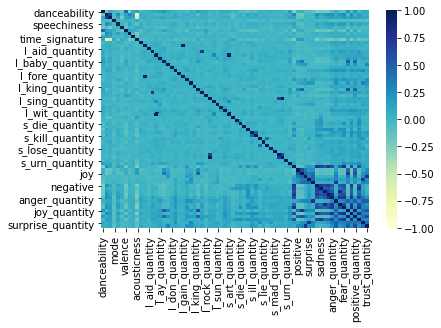

In [6]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")

### Features y Variable Target

In [7]:
X = data.drop(columns=['genre', "valence"])
#X = data.drop(columns=['genre', 'track_name', 'danceability', 'energy',
       #'loudness', 'mode', 'speechiness', 'instrumentalness', 'valence',
       #'tempo', 'time_signature', 'acousticness', 'album_release_year',
       #'lyric', 'tokens'])
y = data["valence"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Dummies

In [9]:
X_train

,danceability,energy,loudness,mode,speechiness,instrumentalness,tempo,time_signature,acousticness,l_ace_quantity,...,anger_quantity,anticipation_quantity,disgust_quantity,fear_quantity,joy_quantity,negative_quantity,positive_quantity,sadness_quantity,surprise_quantity,trust_quantity
491,0.906,0.597,-2.566,1,0.0764,0.000003,124.008,4,0.165000,0.0,...,2,7,1,4,5,4,10,4,3,7
2202,0.456,0.616,-9.164,1,0.0464,0.000000,199.031,4,0.487000,0.0,...,5,6,7,5,7,21,9,16,2,2
1368,0.477,0.951,-4.260,0,0.1580,0.442000,183.132,4,0.000019,0.0,...,53,19,14,58,26,65,27,23,5,21
2865,0.243,0.682,-9.355,0,0.0506,0.000002,148.538,4,0.001090,0.0,...,4,4,1,3,7,3,15,4,5,11
1815,0.736,0.294,-13.760,1,0.0365,0.022900,109.956,4,0.533000,0.0,...,0,0,0,0,6,1,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.362,0.600,-12.285,1,0.0463,0.042600,148.462,4,0.001830,0.0,...,0,4,0,1,12,2,12,1,5,5
3264,0.592,0.516,-8.149,1,0.0291,0.211000,127.136,4,0.000092,0.0,...,38,23,16,65,15,91,36,40,11,28
1653,0.669,0.499,-10.593,1,0.0626,0.000000,96.809,4,0.293000,0.0,...,0,0,1,3,0,4,11,3,0,2
2607,0.258,0.920,-8.955,1,0.0574,0.000000,146.597,4,0.092000,0.0,...,3,6,7,11,3,16,7,13,0,6


In [10]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
dummies = ohe.fit_transform(X_train[["time_signature"]])

In [11]:
columns_dummies = []
for cat in ohe.categories_:
	columns_dummies.extend(cat[:])

In [12]:
dummies = pd.DataFrame(dummies, columns=columns_dummies, index=X_train.index)

In [13]:
X_train = X_train.join(dummies)
X_train = X_train.drop(columns = ["time_signature"], axis=1)

In [14]:
dummies_test = ohe.transform(X_test[["time_signature"]])

In [15]:
dummies_test = pd.DataFrame(dummies_test, columns=columns_dummies, index=X_test.index)

In [16]:
X_test = X_test.join(dummies_test)
X_test = X_test.drop(columns = ["time_signature"], axis=1)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2583, 72)
(2583,)
(862, 72)
(862,)


In [18]:
X_train

,danceability,energy,loudness,mode,speechiness,instrumentalness,tempo,acousticness,l_ace_quantity,l_aga_quantity,...,joy_quantity,negative_quantity,positive_quantity,sadness_quantity,surprise_quantity,trust_quantity,1,3,4,5
491,0.906,0.597,-2.566,1,0.0764,0.000003,124.008,0.165000,0.0,0.0,...,5,4,10,4,3,7,0.0,0.0,1.0,0.0
2202,0.456,0.616,-9.164,1,0.0464,0.000000,199.031,0.487000,0.0,0.0,...,7,21,9,16,2,2,0.0,0.0,1.0,0.0
1368,0.477,0.951,-4.260,0,0.1580,0.442000,183.132,0.000019,0.0,0.0,...,26,65,27,23,5,21,0.0,0.0,1.0,0.0
2865,0.243,0.682,-9.355,0,0.0506,0.000002,148.538,0.001090,0.0,0.0,...,7,3,15,4,5,11,0.0,0.0,1.0,0.0
1815,0.736,0.294,-13.760,1,0.0365,0.022900,109.956,0.533000,0.0,0.0,...,6,1,7,1,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.362,0.600,-12.285,1,0.0463,0.042600,148.462,0.001830,0.0,0.0,...,12,2,12,1,5,5,0.0,0.0,1.0,0.0
3264,0.592,0.516,-8.149,1,0.0291,0.211000,127.136,0.000092,0.0,0.0,...,15,91,36,40,11,28,0.0,0.0,1.0,0.0
1653,0.669,0.499,-10.593,1,0.0626,0.000000,96.809,0.293000,0.0,0.0,...,0,4,11,3,0,2,0.0,0.0,1.0,0.0
2607,0.258,0.920,-8.955,1,0.0574,0.000000,146.597,0.092000,0.0,2.0,...,3,16,7,13,0,6,0.0,0.0,1.0,0.0


----------------------------------

## ElasticNet

In [19]:
baseline = sm.OLS(y_train, sm.add_constant(X_train)).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     26.24
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          4.12e-243
Time:                        18:50:46   Log-Likelihood:                 591.60
No. Observations:                2583   AIC:                            -1043.
Df Residuals:                    2513   BIC:                            -633.2
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4262      0.036    -11.765      0.000      -0.497      -0.355
danceability              0.8471      0.028     29.810      0.000       0.791       0.903
energy                    0.5080      0.031     16.331      0.000       0.447       0.569
loudness                 -0.0099      0.002     -6.413      0.000      -0.013      -0.007
mode                      0.0039      0.009      0.455      0.649      -0.013       0.021
speechiness              -0.4361      0.068     -6.442      0.000      -0.569      -0.303
instrumentalness         -0.0638      0.020     -3.159      0.002      -0.103      -0.024
tempo                     0.0017      0.000     12.410      0.000       0.001       0.002
acousticness              0.1508      0.019      8.073      0.000       0.114       0.187
l_ace_quantity           -0.0061      0.002     -2.635      0.008      -0.011      -0.002
l_aga_quantity           -0.0314      0.014     -2.295      0.022      -0.058      -0.005
l_aid_quantity            0.0086      0.003      3.326      0.001       0.004       0.014
l_ally_quantity          -0.0076      0.004     -1.835      0.067      -0.016       0.001
l_art_quantity           -0.0003      0.001     -0.342      0.732      -0.002       0.001
l_ay_quantity            -0.0004      0.001     -0.574      0.566      -0.002       0.001
l_baby_quantity           0.0004      0.002      0.247      0.805      -0.003       0.003
l_dance_quantity          0.0007      0.002      0.316      0.752      -0.004       0.005
l_don_quantity            0.0026      0.004      0.732      0.464      -0.004       0.010
l_eat_quantity            0.0007      0.002      0.420      0.674      -0.002       0.004
l_fore_quantity          -0.0100      0.004     -2.705      0.007      -0.017      -0.003
l_gain_quantity           0.0297      0.014      2.151      0.032       0.003       0.057
l_god_quantity           -0.0095      0.004     -2.679      0.007      -0.017      -0.003
l_good_quantity           0.0024      0.002      1.081      0.280      -0.002       0.007
l_king_quantity           0.0017      0.002      1.126      0.260      -0.001       0.005
l_love_quantity          -0.0008      0.001     -0.614      0.539      -0.003       0.002
l_real_quantity           0.0018      0.004      0.480      0.631      -0.005       0.009
l_rock_quantity           0.0038      0.002      2.527      0.012       0.001       0.007
l_sing_quantity          -0.0026      0.003     -0.946      0.344      -0.008       0.003
l_star_quantity          -0.0022      0.004     -0.577      0.564      -0.010       0.005
l_sun_quantity            0.0037      0.004      0.954      0.340      -0.004       0.011
l_top_quantity            0.0013      0.002      0.686      0.493      -0.002       0.005
l_wit_quantity        -

## LASSO

In [20]:
kf = KFold(shuffle=True, random_state=10)

In [21]:
model_skl_LassoCV = linear_model.LassoCV(alphas=np.linspace(0.0001,0.01, 100), cv=kf, normalize=True)
model_skl_LassoCV.fit(X_train, y_train)
print("Alpha óptimo:", model_skl_LassoCV.alpha_)
print("R2 Lasso de entrenamiento:",model_skl_LassoCV.score(X_train, y_train).round(3))

Alpha óptimo: 0.0001
R2 Lasso de entrenamiento: 0.391


In [22]:
betas = pd.DataFrame(data= model_skl_LassoCV.coef_ , index=X_train.columns, columns=['Betas'])

betas_0_mask = betas.Betas == 0
print("Variables igualadas a 0 por Lasso:", betas_0_mask.sum())

Variables igualadas a 0 por Lasso: 40


In [23]:
betas.sort_values(by = "Betas", ascending = False)

,Betas
danceability,0.785333
energy,0.345381
acousticness,0.103838
joy,0.067517
4,0.009854
...,...
fear,-0.010825
instrumentalness,-0.029835
negative,-0.042126
anger,-0.122801


## RIDGE

In [24]:
model_skl_RidgeCV = linear_model.RidgeCV(alphas=np.linspace(0.001,0.1, 100), cv=kf, normalize=True)
model_skl_RidgeCV.fit(X_train, y_train)
print("Alpha óptimo:", model_skl_RidgeCV.alpha_)
print("R2 Ridge de entrenamiento:",model_skl_RidgeCV.score(X_train, y_train).round(3))

Alpha óptimo: 0.022000000000000002
R2 Ridge de entrenamiento: 0.417


## Predicción ElasticNet

In [25]:
prediction_lasso = model_skl_LassoCV.predict(X_test)
#print ('R2 Statmodels OLS:', r2_score(y_test, prediction_sm).round(3))

Text(0.5, 0, 'Y_test')

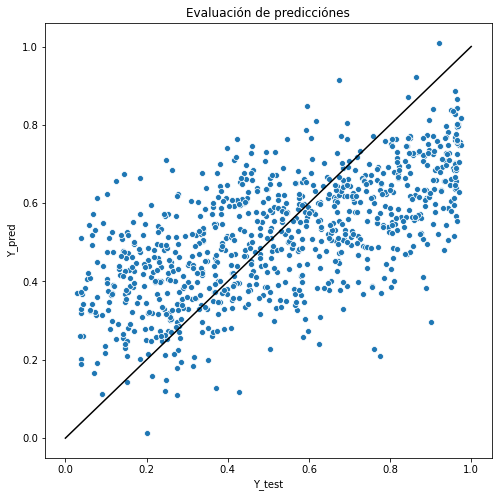

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test,prediction_lasso)
sns.lineplot([0,1],[0,1],color='black')
plt.title("Evaluación de predicciónes")
plt.ylabel("Y_pred")
plt.xlabel("Y_test")

In [28]:
y_test.shape

(862,)

In [29]:
#ElasticNet
resultados_elasticnet = [["ElasticNet", 
                          r2_score(y_test, baseline.predict(sm.add_constant(X_test))), 
                          r2_score(y_train, baseline.predict(sm.add_constant(X_train)))
                         ]]
resultados = pd.DataFrame(resultados_elasticnet, columns=["modelo", "r2_test", "r2_train"])

#Lasso
resultados_lasso = [["Lasso", r2_score(y_test, model_skl_LassoCV.predict(X_test)), r2_score(y_train, model_skl_LassoCV.predict(X_train))]]
resultados_lasso_df = pd.DataFrame(resultados_lasso, columns=["modelo", "r2_test", "r2_train"])

#Ridge
resultados_ridge = [["Ridge", r2_score(y_test, model_skl_RidgeCV.predict(X_test)), r2_score(y_train, model_skl_RidgeCV.predict(X_train))]]
resultados_ridge_df = pd.DataFrame(resultados_ridge, columns=["modelo", "r2_test", "r2_train"])

#Tabla final
resultados = resultados.append([resultados_lasso_df, resultados_ridge_df])
resultados.reset_index(drop=True, inplace=True)

In [30]:
resultados

,modelo,r2_test,r2_train
0,ElasticNet,0.387852,0.418723
1,Lasso,0.398177,0.390603
2,Ridge,0.390729,0.416910


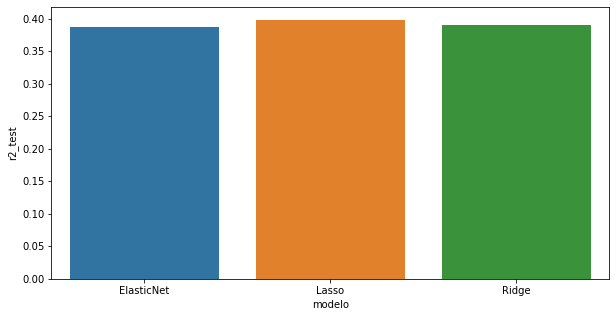

In [31]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.barplot(x=resultados["modelo"], y=resultados["r2_test"])

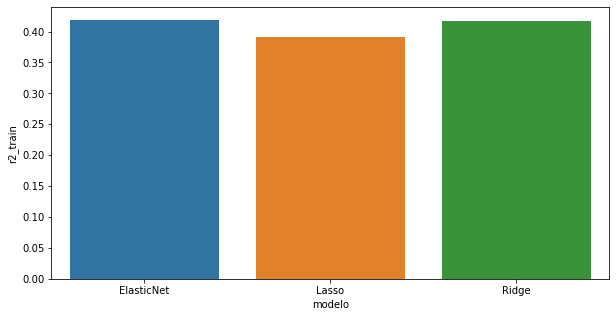

In [32]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.barplot(x=resultados["modelo"], y=resultados["r2_train"])